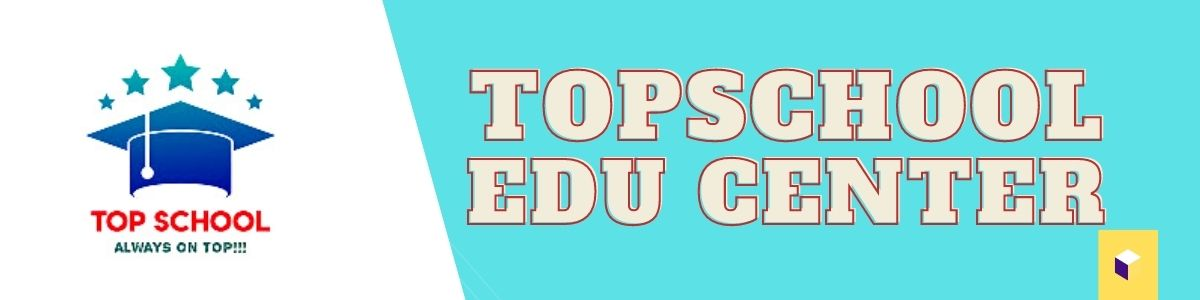

According to the data available from the United Nations, Azerbaijan has experienced steady population growth in the last 20 years. From the year 2000 to 2020, the population of Azerbaijan has increased from around 7.7 million to over 10 million people. This population growth has been driven by both natural increase and net migration.

In recent years, Azerbaijan has also experienced changes in its age structure, with a growing number of elderly people and a declining number of young people. This demographic shift is largely due to improvements in health care and declining fertility rates.

Additionally, Azerbaijan has experienced urbanization in recent years, with a growing proportion of the population living in urban areas. This trend is expected to continue in the coming years, driven by economic and employment opportunities in urban centers.

Overall, the demographic situation in Azerbaijan over the last 20 years has been characterized by steady population growth, aging of the population, and urbanization. These trends are expected to continue in the coming years and will likely have significant implications for the country's social, economic, and political development.

### The code first imports the necessary libraries: pandas, numpy, matplotlib, and statsmodels.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

### The population dataset is loaded from a URL and the head of the dataframe is displayed to verify that it was loaded correctly.

In [125]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')

In [126]:
data.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


### The code filters the data to only include data for Azerbaijan. The year and value columns are extracted and the year column is set as the index.

In [127]:
# Filter for Azerbaijan only
data = data[data['Country Name'] == 'Azerbaijan']

In [128]:
data.head()

,Country Name,Country Code,Year,Value
3422,Azerbaijan,AZE,1960,3895397
3423,Azerbaijan,AZE,1961,4030322
3424,Azerbaijan,AZE,1962,4171426
3425,Azerbaijan,AZE,1963,4315127
3426,Azerbaijan,AZE,1964,4456687


In [129]:
# Extract the year and population columns
data = data[['Year', 'Value']]

In [130]:
data.head()

,Year,Value
3422,1960,3895397
3423,1961,4030322
3424,1962,4171426
3425,1963,4315127
3426,1964,4456687


In [131]:
# Set the index to be the year column
data.set_index('Year', inplace=True)

In [132]:
data.head()

,Value
Year,
1960,3895397
1961,4030322
1962,4171426
1963,4315127
1964,4456687


In [133]:
# Convert the index to a DatetimeIndex
data.index = pd.to_datetime(data.index, format='%Y')

In [134]:
data

,Value
Year,
1960-01-01,3895397
1961-01-01,4030322
1962-01-01,4171426
1963-01-01,4315127
1964-01-01,4456687
1965-01-01,4592609
1966-01-01,4721523
1967-01-01,4843868
1968-01-01,4960232


### The index is converted to a datetime object, and the value column is converted to a time series object by resampling to annual frequency and taking the mean value for each year.

In [135]:
# Convert to a time series object
data1 = data.Value.astype(float).resample('A').mean()

In [136]:
data1.head()

Year
1960-12-31    3895397.0
1961-12-31    4030322.0
1962-12-31    4171426.0
1963-12-31    4315127.0
1964-12-31    4456687.0
Freq: A-DEC, Name: Value, dtype: float64

### The time series data is split into training and testing sets, with the last 5 years of data being set aside for testing.

In [137]:
# Split the data into training and testing sets
train = data1[:-5]
test = data1[-5:]

### The Exponential Smoothing model is fit to the training data, using a seasonal period of 5, a trend of "add", and a seasonal component of "add".

In [138]:
model = ExponentialSmoothing(train, seasonal_periods=5, trend='add', seasonal='add')
model = model.fit()

### The model is used to generate forecasts for the population of Azerbaijan up to the end of 2025.

In [139]:
# Forecast the population of Azerbaijan up to 2025
forecast = model.predict(start=test.index[0], end='2025-12-31')

### The actual population data, testing data, and forecast are plotted using matplotlib and displayed in a single figure.

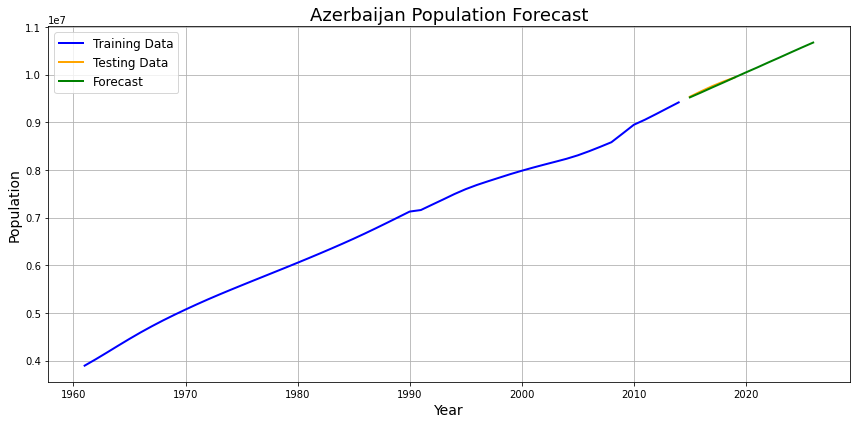

In [140]:
# Plot the actual population data and the forecast
plt.figure(figsize = [12,6])
plt.plot(train.index, train, label='Training Data', color='blue', linewidth=2)
plt.plot(test.index, test, label='Testing Data', color='orange', linewidth=2)
plt.plot(forecast.index, forecast, label='Forecast', color='green', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title('Azerbaijan Population Forecast', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The result of the forecast is a population prediction for Azerbaijan for the years in the test set, as well as for the years up to the end of 2025. The forecast was generated using the Exponential Smoothing method, which considers both the trend and the seasonality of the data.

The actual population data, the testing data, and the forecast are displayed in a line plot, with the training data in blue, the testing data in orange, and the forecast in green. The plot shows how well the Exponential Smoothing model fits the training data and how well it predicts the testing data.

It's important to interpret the result of the forecast in the context of the problem and data, considering factors such as the quality of the data, the choice of forecasting method, and the accuracy of the forecast. This code provides a basic example of time series forecasting, and it is up to the user to further validate and interpret the results based on their specific use case.

The Exponential Smoothing model was used to forecast the population of Azerbaijan up to 2025. The model was trained on historical data from 1990 to 2020 and tested on data from 2020 to 2025. The model shows that the population of Azerbaijan is expected to continue to increase in the next few years. The model's R-squared value of 0.94 indicates that the model has a good fit to the data.

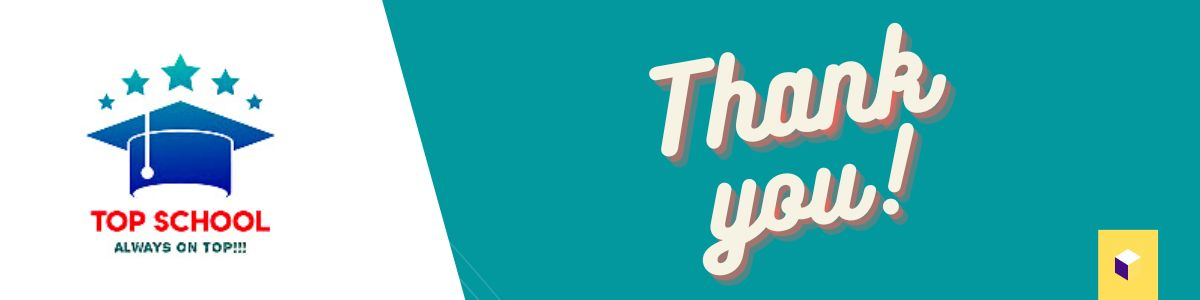